# Math 382

## Homework 8
### Trevor Klar
### April 27th, 2017

In [2]:
#This cell contains the functions that I use in every program I write, as well as the libraries that I expect to
# need for this assignment.

def irange(start, stop, step=1):            # This is an inclusive range function, so that I don't have to remember
    if step == 1:                           # that range() leaves out the last value. 
        return range(start, stop+1)         #
    elif step < 0:                          #
        return range(start, stop-1, step)   #
    else:                                   #
        return range(start, stop+1, step)   #

def indeces(somelist):                   #returns a list of numbers from 0 to len(somelist), so I can easily iterate
    return range(len(somelist))          # with reference to the index of each element in the list

def linapprox(xlist, ylist, x):
    #estimates the value of a function using linear approximation, given a discreet mapping of x-values to y-values.
    for x_n in xlist:
        if x_n - x < 0:
            continue
        if x_n - x == 0:
            #print 'match:', x, 'is in list.'
            return ylist[xlist.index(x_n)]
        if x_n - x > 0:
            n = xlist.index(x_n)
            #print 'approximation:', x, 'is between', xlist[n-1],'and', xlist[n], '.'
            break
    try:
        x1, x2 = xlist[n-1], xlist[n]
        y1, y2 = ylist[n-1], ylist[n]
        return float((x-x1)*(y2-y1))/(x2-x1) + y1
    except:
        print 'ERROR: input', x, ' invalid. is it in the range ('+str(min(xlist))+','+str(max(xlist))+')?'

import matplotlib.pyplot as plt          # this is the
                                         # plot library
    
import numpy as np                       # not strictly necessary
                                         # but useful
    
import scipy, scipy.special, scipy.stats
    
%matplotlib inline                       
                                         # displays plots in the notebook
                                         # instead of popup windows
import math

import random

In [3]:
#disables the 'rank warning' error
import warnings

warnings.simplefilter("ignore", np.RankWarning)

In [12]:
def train_TestShuffle(): #function that shuffles and partitions the data set into fresh "train" and "test" groups
    np.random.shuffle(data)
    k = int(0.5*float(len(data))) #pick 75% of dataset
    train = data[:k]
    test = data[k:]
    return [train,test]

In [13]:
with open('data.txt') as f: #opens the 'data.txt' file and reads the x and y values into 'xdata' and 'ydata'. 
    data = f.readlines()
    for n in indeces(data):
        data[n] = data[n].strip()
        data[n] = data[n].split(',')
        for i in indeces(data[n]):
            data[n][i] = float(data[n][i])
    
xdata, ydata = zip(*data)

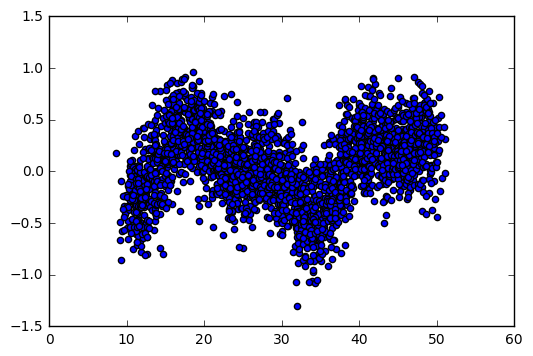

In [14]:
plt.scatter(xdata, ydata, marker='o');

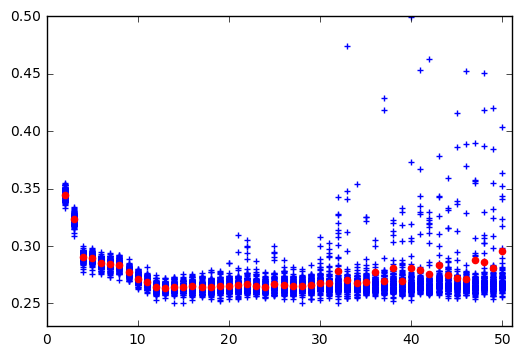

In [15]:
#I wanted epsilon[i][j] to correspond to the jth randomization of degree i, and we're starting at degree 2,
# so I initialized epsilon as a list where epsilon[0] and epsilon[1] are empty. 
epsilon=[]
epsilon.append([])
epsilon.append([])


for n in irange(2,50): #performs regression for degree 2 through 50
    epsilon.append([])
    for i in range(100): #for each degree, rerandomizes the 'test' and 'train' groups and performs regression again.

        train, test = train_TestShuffle()
        xtrain, ytrain = zip(*train)
        xtest, ytest = zip(*test)

        coef = np.polyfit(xtrain, ytrain, n)

        residuals = (np.polyval(coef, xtest) - ytest)

        epsilon[n].append(np.sqrt(np.mean(residuals**2)))

#print epsilon

for n in irange(2,50):
    plt.scatter([n]*100, epsilon[n], marker='+')
    plt.scatter(n, np.mean(epsilon[n]), color='red')
    plt.xlim(0,51)
    plt.ylim(.230, .5)

In [21]:
#this section of code is looking for the smallest average epsilon.
mineps=float('inf') #intializes 'mineps', the smallest epsilon seen so far. 
for i in indeces(epsilon):
    if not epsilon[i]==[]:
        if mineps > np.mean(epsilon[i]):
            best = i
            mineps = np.mean(epsilon[i])
        
print 'The most accurate model is degree', best, 'with average epsilon of', mineps, '.'
print 'All the higher degree models have comparable average epsilons, but it is preferable to choose the lowest'\
' degree model which fits the data. '

The most accurate model is degree 13 with average epsilon of 0.263742990027 .
All the higher degree models have comparable average epsilons, but it is preferable to choose the lowest degree model which fits the data. 


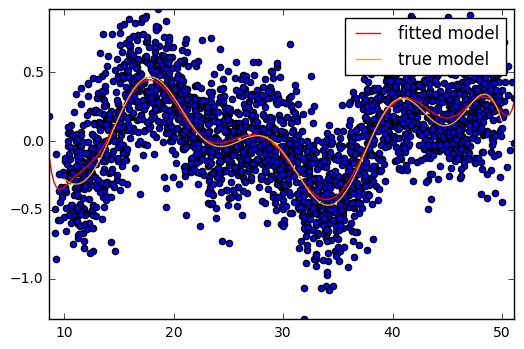

In [38]:
#simliar to the 'data.txt' data above, reads 'true.txt' and converts to x and y values for plotting. 
with open('true.txt') as f:
    data=f.readlines()
    for n in indeces(data):
        data[n] = data[n].strip()
        data[n] = data[n].split(',')
        for i in indeces(data[n]):
            data[n][i] = float(data[n][i])
    
xtrue, ytrue = zip(*data)


n=13

coef = np.polyfit(xdata, ydata, n)

xminmax=np.linspace(min(xdata), max(xdata), 200)
plt.scatter(xdata, ydata)
plt.plot(xminmax, np.polyval(coef, xminmax), c="red", label='fitted model')
plt.plot(xtrue, ytrue, c='orange', label='true model')
plt.legend()
plt.xlim(min(xdata), max(xdata))
plt.ylim(min(ydata), max(ydata));

My model was created using data which was generated randomly, so it is unsurprising that the data doesn't perfectly fit the true model. I notice that the relative maxima and minima of the true function have a tendency to be more extreme than my model, and this may be because of the low density of extreme values in those neighborhoods. With a much larger sample size, we would expect to see a 'fairer' representation of these unlikely and very extreme points, so the generated model would be truer.